### Hello, and welcome to this project. I am Abiodun Eesuola


#### Template:

> eHealth Africa has carried out an investigation on various factors that could determine if someone has covid-19 or not. The attached data are cases of covid-19 in the town of  Hocus Pocus. You will use your machine learning and data science techniques for predictive modeling and risk analysis, particularly in the healthcare sector. 

The tasks require me to deliver the following:

- Data Collection and Preparation
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Choose appropriate machine learning algorithms, such as logistic regression, decision trees, random forests, or gradient boosting machines.
-- Consider using ensemble methods to improve prediction accuracy.

- Model Training
--Use cross-validation to tune hyperparameters and prevent overfitting.

- Model Evaluation
-- Evaluate the models using the testing data with metrics such as accuracy, precision, recall, F1 score, and AUC-ROC.
- Compare the performance of different models to select the best one.
- Use the model to predict the likelihood of COVID-19 cases based on the factors provided.- Develop a flask API, if possible add an HTML to the model
- Deployment
- Develop a visualization

Let's begin!

### Data Collection and Preparation

The dataset for this assignment was provided by **eHealth Africa**, based on their investigation into factors associated with COVID-19 cases in the town of Hocus Pocus. It contains anonymized records of individuals, including demographic information (such as sex and birth year) and a range of clinical symptoms and observations.

Upon receiving the data, I began with initial inspection and found that the dataset required significant cleaning and preparation. The data was loaded using `pandas`, and missing rows were removed to ensure consistency. A warning about mixed data types in several columns was noted, indicating possible inconsistencies in data entry (e.g., values stored as both strings and numbers). These columns were carefully reviewed to ensure correct parsing.

Duplicate records were removed, and the target variable — `Result` — was examined to confirm it contained the expected categories: `POSITIVE`, `NEGATIVE`, and `PENDING`. Entries with `PENDING` or missing results were excluded from the modeling process to ensure a reliable outcome variable.

Overall, the preparation phase focused on ensuring data quality, removing irrelevant records, and structuring the dataset for meaningful analysis and modeling.


In [1]:
# Introduction: loading the dataset while automatically dropping empty rows, columns, and duplicates
import pandas as pd
data = pd.read_csv(r"c:\Users\USER\Desktop\eHealthOrg\Assignment 2\COVID19 - COVID19.csv").dropna(how = 'all').drop_duplicates().dropna(how = 'all', axis = 1)
display(data)

C:\Users\USER\AppData\Local\Temp\ipykernel_11408\3700715999.py:3: DtypeWarning: Columns (8,9,10,13,16,20,24,32,45) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"c:\Users\USER\Desktop\eHealthOrg\Assignment 2\COVID19 - COVID19.csv").dropna(how = 'all').drop_duplicates().dropna(how = 'all', axis = 1)


,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,...,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,PENDING
1,MALE,1976.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MALE,1988.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
3,MALE,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FEMALE,1978.0,NO,NO,NO,YES,NO,YES,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109746,FEMALE,1999.0,YES,NaN,NaN,NO,YES,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
109860,MALE,2000.0,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
109883,FEMALE,1995.0,YES,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEGATIVE
109924,MALE,1986.0,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POSITIVE


In [2]:
# Checking the columns of the dataset and a brief summary
data.columns.tolist(), data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5566 entries, 0 to 109925
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sex                                        5161 non-null   object 
 1   Birth Year                                 5358 non-null   float64
 2   Chest pain                                 4594 non-null   object 
 3   Chills or sweats                           3560 non-null   object 
 4   Confused or disoriented                    3378 non-null   object 
 5   Cough                                      4629 non-null   object 
 6   Diarrhea                                   4567 non-null   object 
 7   Difficulty breathing or Dyspnea            3579 non-null   object 
 8   Digested blood or coffee grounds in vomit  13 non-null     object 
 9   Pain behind eyes or Sensitivity to light   18 non-null     object 
 10  Bleeding from the eyes     

(['Sex',
  'Birth Year',
  'Chest pain',
  'Chills or sweats',
  'Confused or disoriented',
  'Cough',
  'Diarrhea',
  'Difficulty breathing or Dyspnea',
  'Digested blood or coffee grounds in vomit',
  'Pain behind eyes or Sensitivity to light',
  'Bleeding from the eyes',
  'Fatigue or general weakness',
  'Fever',
  'Fluid in the lung cavity',
  'Fluid in lung cavity in auscultation',
  'Fluid in cavity through X-Ray',
  'Bleeding of the gums',
  'Headache',
  'Joint pain or arthritis',
  'Thorax (sore throat)',
  'Malaise',
  'Muscle pain',
  'Nausea',
  'Other clinical symptoms',
  'Pharyngeal exudate',
  'Rapid breathing',
  'Runny nose',
  'Maculopapular rash',
  'Sore throat or pharyngitis',
  'Bleeding or bruising',
  'Vomiting',
  'Abnormal lung X-Ray findings',
  'Conjunctivitis',
  'Acute respiratory distress syndrome',
  'Pneumonia (clinical or radiologic)',
  'Loss of Taste',
  'Loss of Smell',
  'Cough with sputum',
  'Cough with heamoptysis',
  'Enlarged lymph nodes',
 

What I can infer from the above is that the dataset contains **health symptom data** and **demographics** for people tested for **COVID-19**

- Key columns include:
  - `Sex` (MALE / FEMALE)
  - `Birth Year` → we can use to calculate age
  - Many symptom columns like: `Chest pain`, `Cough`, `Difficulty breathing`, etc. (values: `YES` / `NO`)
  - `Result` → this is our **target variable** (POSITIVE, NEGATIVE, PENDING)

- There are **47 columns** and over **5000 rows**
- Some values are missing (`NaN`)
- The `Result` column has:
  - `POSITIVE`
  - `NEGATIVE`
  - `PENDING` (Ill remove these, since it's important to be exact when dealing with health outcomes)

---
I'll create a Python script to:

1. Load the data (so that it can be reused by someone else, or applied to another batch of the same data structure automatically)
2. Fix the `Result` column by removing any `PENDING` or missing results, keeping only `POSITIVE` and `NEGATIVE`
3. Keep only useful rows

---
The script is saved in a file called `covid_model.py` in the folder "Assignment 2". It returns a "parboiled" csv file usable for EDA. We wil call that "cleaned_covid_data"

In [3]:
# Loading the semi-cleaned data for EDA
cleaned_data = pd.read_csv(r"c:\Users\USER\Desktop\eHealthOrg\Assignment 2\cleaned_covid_data.csv")
cleaned_data

,Sex,Birth Year,Chest pain,Chills or sweats,Confused or disoriented,Cough,Diarrhea,Difficulty breathing or Dyspnea,Digested blood or coffee grounds in vomit,Pain behind eyes or Sensitivity to light,...,Cough with sputum,Cough with heamoptysis,Enlarged lymph nodes,Wheezing,Skin ulcers,Inability to walk,Indrawing of chest wall,Other complications,Specify other complications,Result
0,MALE,1988.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,FEMALE,1978.0,NO,NO,NO,YES,NO,YES,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,MALE,1995.0,NO,NO,NO,YES,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,MALE,1967.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,MALE,2015.0,NO,NO,NO,NO,NO,NO,NaN,NaN,...,NO,NO,NO,NO,NO,NO,NO,1.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788,FEMALE,1999.0,YES,NaN,NaN,NO,YES,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3789,MALE,2000.0,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3790,FEMALE,1995.0,YES,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3791,MALE,1986.0,NO,NaN,NaN,NO,NO,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
print(f"Shape: {cleaned_data.shape}")
print(f"Target distribution:\n{cleaned_data['Result'].value_counts()}")

Shape: (3793, 47)
Target distribution:
Result
0    2899
1     894
Name: count, dtype: int64


There are still a lot of missing values, but we will address that during ML/feature engineering. For now, some EDA

**1, Do males or females have higher positivity rates?**

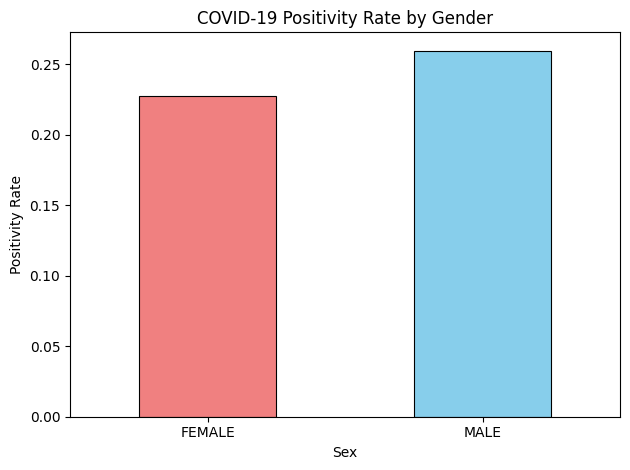

In [5]:
# EDA 1: Gender vs Result
import matplotlib.pyplot as plt

# Calculate positivity rate by sex
positivity_by_sex = cleaned_data.groupby('Sex')['Result'].mean()

# Plot 
colors = ['lightcoral', 'skyblue']  
positivity_by_sex.plot(
    kind='bar',
    title='COVID-19 Positivity Rate by Gender',
    color=colors,
    edgecolor='black', 
    linewidth=0.8
)

plt.ylabel('Positivity Rate')
plt.xticks(rotation=0)  
plt.tight_layout() 
plt.show()

### Interpretation:

- **Male** individuals have a **higher positivity rate** (~26%) compared to **Female** individuals (~23%).
- This suggests that, in this dataset, **males are slightly more likely to test positive** for COVID-19 than females.

In [6]:

# We have `Birth Year` — let’s create a new column: **Age** 

cleaned_data['Age'] = 2024 - cleaned_data['Birth Year']

# Check the new column
cleaned_data[['Sex', 'Birth Year', 'Age', 'Result']].head()

# This helps us explore whether age is related to positivity.


,Sex,Birth Year,Age,Result
0,MALE,1988.0,36.0,0
1,FEMALE,1978.0,46.0,0
2,MALE,1995.0,29.0,0
3,MALE,1967.0,57.0,0
4,MALE,2015.0,9.0,0


**2, How does positivity vary by age group? Let’s see if older or younger people are more likely to test positive.**

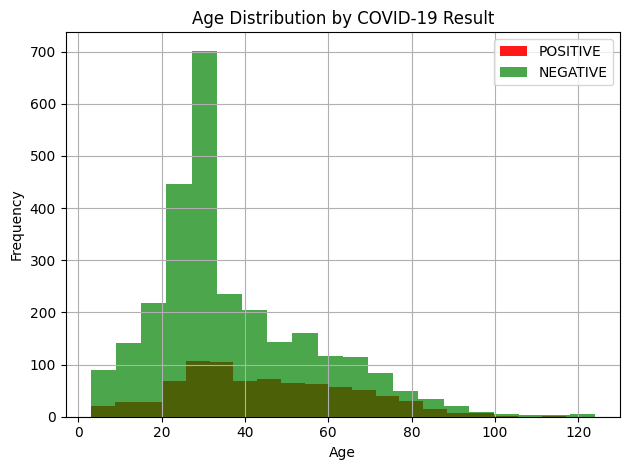

In [7]:
# EDA 2: Age distribution by Result
import matplotlib.pyplot as plt

# Separate positive and negative cases
cleaned_data[cleaned_data['Result'] == 1]['Age'].hist(
    alpha=0.9, 
    label='POSITIVE', 
    color='red', 
    bins=20
)

cleaned_data[cleaned_data['Result'] == 0]['Age'].hist(
    alpha=0.7, 
    label='NEGATIVE', 
    color='green', 
    bins=20
)

plt.title('Age Distribution by COVID-19 Result')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

### Interpretation:

- **Most patients are aged 20–40.** 
- **Positivity appears slightly more common in middle-aged adults (30–50), while younger individuals are less likely to test positive.**

**3, Which Symptoms Are Linked to Positivity? Let's start with cough**

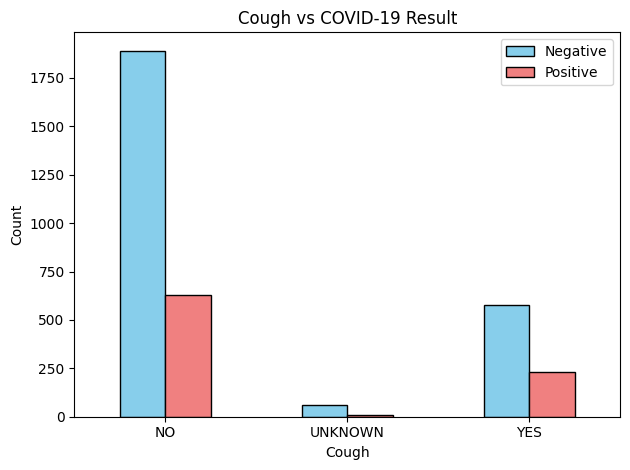

In [8]:
# EDA 3: Cough vs Result
import matplotlib.pyplot as plt

# Cross-tabulate Cough and Result
pd.crosstab(cleaned_data['Cough'], cleaned_data['Result']).plot(
    kind='bar',
    color=['skyblue', 'lightcoral'],
    edgecolor='black'
)

plt.title('Cough vs COVID-19 Result')
plt.xlabel('Cough')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

### Interpretation:

- **Cough is not a strong predictor of COVID-19 in this dataset**
- **Many positive cases do not report cough**
- **A large number of negative cases do have cough**

**4, How about fever as a symptom?**

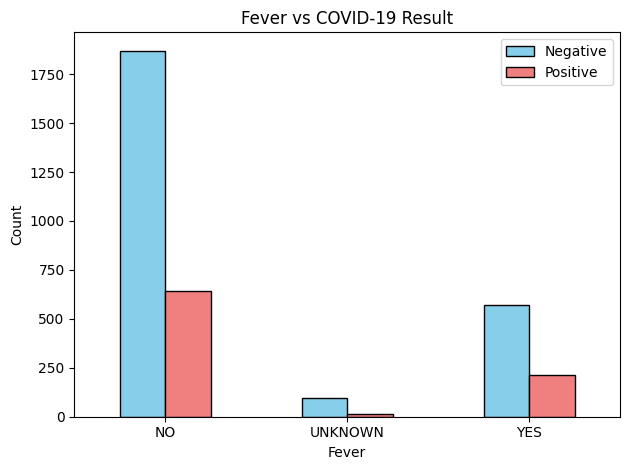

In [9]:
# EDA 4: Fever vs Result
pd.crosstab(cleaned_data['Fever'], cleaned_data['Result']).plot(
    kind='bar',
    color=['skyblue', 'lightcoral'],
    edgecolor='black'
)

plt.title('Fever vs COVID-19 Result')
plt.xlabel('Fever')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

### Interpretation:

- **Most patients (both positive and negative) do not report fever, with over 1,700 negative cases and 600 positive cases reporting "NO".**
- **Only about 200 positive cases reported "YES" for fever — which is less than half of the total positive cases.**
- **A small number of cases have "UNKNOWN" fever status, but they are negligible.**

This suggests:

Fever is not a strong predictor of COVID-19 positivity in this dataset — many positive cases do not have fever.

**5, Do people with difficulty breathing test positive more often?**

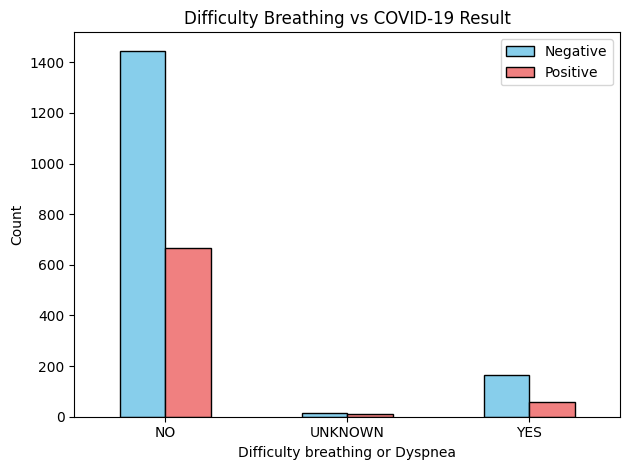

In [10]:
# EDA 5: Difficulty breathing vs Result
pd.crosstab(cleaned_data['Difficulty breathing or Dyspnea'], cleaned_data['Result']).plot(
    kind='bar',
    color=['skyblue', 'lightcoral'],
    edgecolor='black'
)

plt.title('Difficulty Breathing vs COVID-19 Result')
plt.xlabel('Difficulty breathing or Dyspnea')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Negative', 'Positive'])
plt.tight_layout()
plt.show()

### Interpretation:
- **Most patients (both positive and negative) do not report difficulty breathing, with over 1,400 negative cases and 650 positive cases reporting "NO".**
- **Only about 70 positive cases reported "YES" for difficulty breathing — which is less than 10% of total positive cases.**
- **A small number of cases have "UNKNOWN" status, but they are negligible.**

This suggests:

Difficulty breathing is not a strong predictor of COVID-19 positivity in this dataset — many positive cases do not have this symptom. 

**6, Finally, let's check correlations between symptoms and infection status**

In [11]:
# EDA FINAL: Correlation 

# Step 1: Prepare a clean version of the data
eda_data = cleaned_data.copy()

# Convert YES/NO to 1/0 for key symptoms
symptom_columns = [
    'Chest pain', 'Chills or sweats', 'Cough', 'Diarrhea', 
    'Difficulty breathing or Dyspnea', 'Fever', 'Headache', 
    'Loss of Taste', 'Loss of Smell', 'Sore throat or pharyngitis',
    'Vomiting', 'Fatigue or general weakness'
]

# Handle case variations and convert
for col in symptom_columns:
    eda_data[col] = eda_data[col].str.strip().str.upper()
    eda_data[col] = eda_data[col].map({'YES': 1, 'NO': 0})

# Convert Sex: MALE=1, FEMALE=0
eda_data['Sex'] = eda_data['Sex'].str.strip().str.upper()
eda_data['Sex'] = eda_data['Sex'].map({'MALE': 1, 'FEMALE': 0})

# Use 'Age' we created earlier
# Keep only relevant columns
eda_data = eda_data[['Age', 'Sex'] + symptom_columns + ['Result']]

# Drop rows with missing values in key fields
eda_data.dropna(inplace=True)

# Compute correlation with Result
correlation_with_result = eda_data.corr()[['Result']].sort_values(by='Result', ascending=False)

print("Correlation with COVID-19 Result (Top & Bottom):")
print(correlation_with_result)

Correlation with COVID-19 Result (Top & Bottom):
                                   Result
Result                           1.000000
Age                              0.160239
Sore throat or pharyngitis       0.056847
Fatigue or general weakness      0.031137
Sex                             -0.003758
Cough                           -0.016272
Chills or sweats                -0.030340
Loss of Smell                   -0.035931
Vomiting                        -0.037714
Difficulty breathing or Dyspnea -0.039968
Loss of Taste                   -0.043844
Diarrhea                        -0.044585
Fever                           -0.078940
Headache                        -0.102105
Chest pain                      -0.109582


### Interpretation:

- **Age shows the strongest positive correlation (0.16) with being positive — suggesting older individuals in this dataset are slightly more likely to test positive.**
- **Sore throat or pharyngitis is weakly linked to positivity (0.057), but still the most associated symptom.**
- **Most symptoms — including fever, cough, headache, chest pain — show negative or near-zero correlation, meaning they are not reliable predictors of a positive result in this population.**
- **Loss of Taste and Smell, often considered key signs, are negatively correlated (–0.044 and –0.036), suggesting many positive cases did not report these symptoms — or were asymptomatic.**
- **Gender has almost no correlation (–0.004), meaning males and females have similar positivity rates after all.**

---

### Summary of EDA:
In the town of Hocus Pocus, age is the strongest predictor of COVID-19 positivity — not classic symptoms like fever or cough.
This could suggest asymptomatic or atypical presentations are common, making symptom-based screening less effective. 

### Feature Engineering/Model training


There are a lot of missing values in our target variable, and our exercise is a **classification** task, so I'll use models like **XGBoost and/or Random Forest** because they can handle missing data effectively without requiring imputation, and they provide robust performance on structured datasets with mixed feature types. Additionally, these models offer good interpretability through feature importance, which helps in understanding the key factors influencing COVID-19 prediction.

In [12]:

# Make a copy of cleaned_data
model_data = cleaned_data.copy()

# Recalculate Age for 2025
model_data['Age'] = 2025 - model_data['Birth Year']

# List of key symptoms to include
symptom_cols = [
    'Cough', 'Fever', 'Difficulty breathing or Dyspnea',
    'Fatigue or general weakness', 'Headache', 'Sore throat or pharyngitis',
    'Loss of Taste', 'Loss of Smell', 'Vomiting', 'Diarrhea',
    'Chest pain', 'Chills or sweats'
]

# Convert YES/NO to 1/0 (safe for NaN)
for col in symptom_cols:
    model_data[col] = model_data[col].fillna('NO')  # Assume missing = NO
    model_data[col] = model_data[col].astype(str).str.upper()
    model_data[col] = model_data[col].map({'YES': 1, 'NO': 0})

# Convert Sex: MALE=1, FEMALE=0
model_data['Sex'] = model_data['Sex'].fillna('NO')
model_data['Sex'] = model_data['Sex'].astype(str).str.upper()
model_data['Sex'] = model_data['Sex'].map({'MALE': 1, 'FEMALE': 0})

# Select final columns for modeling
final_features = ['Age', 'Sex'] + symptom_cols
X = model_data[final_features]
y = model_data['Result']  # Already 1=POSITIVE, 0=NEGATIVE

print("Modeling data prepared.")
print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

Modeling data prepared.
Features shape: (3793, 14)
Target distribution:
Result
0    2899
1     894
Name: count, dtype: int64


I'll be writing the below scripts as standalone scripts for reusability.

In [13]:

# model_training.py
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import xgboost as xgb
import matplotlib.pyplot as plt

# Load cleaned data
cleaned_data = pd.read_csv(r"c:\Users\USER\Desktop\eHealthOrg\Assignment 2\cleaned_covid_data.csv")

# Recalculate Age (2025)
cleaned_data['Age'] = 2025 - cleaned_data['Birth Year']

# Select features
features = [
    'Age', 'Sex',
    'Cough', 'Fever', 'Difficulty breathing or Dyspnea',
    'Fatigue or general weakness', 'Headache', 'Sore throat or pharyngitis',
    'Loss of Taste', 'Loss of Smell', 'Vomiting', 'Diarrhea',
    'Chest pain', 'Chills or sweats'
]

# Prepare X and y
X = cleaned_data[features].copy()

# Convert Sex: MALE=1, FEMALE=0
X['Sex'] = X['Sex'].astype(str).str.upper().map({'MALE': 1, 'FEMALE': 0})

# Keep YES/NO as strings for now
for col in features:
    if col != 'Age' and col != 'Sex':
        X[col] = X[col].astype(str).str.upper()
        X[col] = X[col].map({'YES': 1, 'NO': 0})  # Only map YES/NO, leaves NaN as NaN

y = cleaned_data['Result']  # Already 1=POSITIVE, 0=NEGATIVE

# Train-test split (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Positive cases in training: {y_train.sum()} / {len(y_train)} ({y_train.mean():.2%})")

Training set size: (2655, 14)
Positive cases in training: 626 / 2655 (23.58%)


In [14]:
# Model Training with XGBoost
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluate performance
print(" Model trained and predictions made.")
print(f"Test set size: {X_test.shape[0]}")
print(f"Positive cases in test: {y_test.sum()} / {len(y_test)} ({y_test.mean():.2%})")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Model trained and predictions made.
Test set size: 1138
Positive cases in test: 268 / 1138 (23.55%)


 Model Performance on Test Set:
Accuracy:  0.7496
Precision: 0.4261
Recall:    0.1828
F1 Score:  0.2559
AUC-ROC:   0.7264

 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       870
           1       0.43      0.18      0.26       268

    accuracy                           0.75      1138
   macro avg       0.61      0.55      0.55      1138
weighted avg       0.70      0.75      0.71      1138



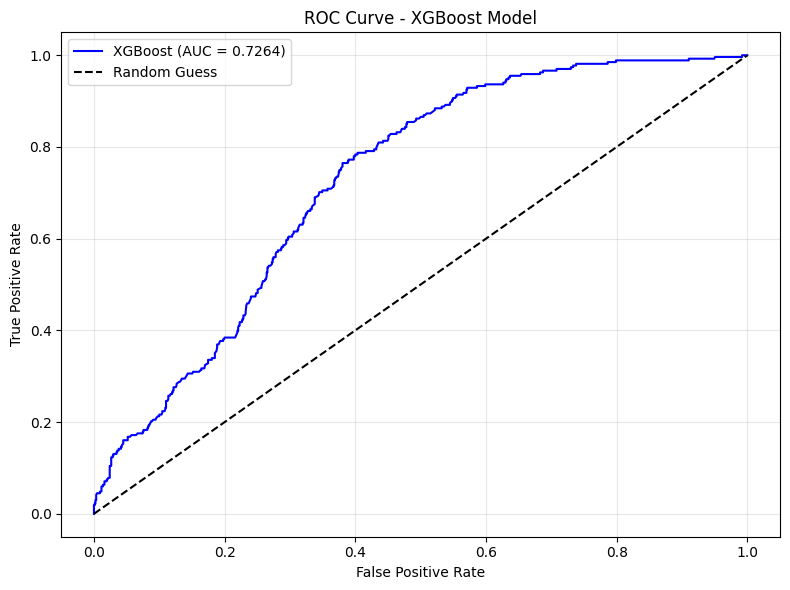

In [15]:

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(" Model Performance on Test Set:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

###  Interpretation of Model Performance

- **Accuracy: 74.96%**  
  → The model correctly predicts positive/negative cases about **75% of the time**, which is decent but not excellent.

- **Precision: 42.61%**  
  → When the model says "POSITIVE", it's correct only **43% of the time**.  
  → This means **many false positives**: people flagged as positive who are actually negative.

- **Recall: 18.28%**  
  → The model finds only **18% of actual positive cases**.  
  → This is very low — many real cases are missed (false negatives).

- **F1 Score: 25.59%**  
  → Harmonic mean of precision and recall — shows overall poor performance on the positive class.

- **AUC-ROC: 72.64%**  
  → The model has **some ability to distinguish** between positive and negative cases, but it's **not strong**.

---

### Key Problem:
> The dataset is **imbalanced** (only ~23.5% positive cases), and the model is **biased toward predicting "NEGATIVE"** — so it achieves high accuracy by default, but fails at detecting real cases.

This is a **critical issue in healthcare** — missing true positives can be dangerous.

---

#### What Should We Do?

Let’s try to fix this with **better evaluation and tuning**:

#####  I'll use **Class Weighting** to handle the imbalance


In [16]:
# Model Training with Class Weighting
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    scale_pos_weight=3.24  # Adjust for class imbalance
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(" Model Performance with Class Weighting:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"AUC-ROC:   {auc:.4f}")

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:09:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Model Performance with Class Weighting:
Accuracy:  0.6757
Precision: 0.3895
Recall:    0.6642
F1 Score:  0.4910
AUC-ROC:   0.7291



###  Interpretation of Model Performance (with Class Weighting)
**Trade-off**: We sacrificed some accuracy and precision to **greatly improve recall** — which is **the right choice** for disease detection.
- **Accuracy: 0.6757 (67.6%)**  
  → Lower than before, but expected — the model is now predicting more **positives**, so it gets fewer overall correct (since negatives are more common).

- **Precision: 38.95%**  
  → When the model says "POSITIVE", it's correct about **39% of the time** — still room for improvement.

- **Recall: 66.42%** ✅  
  → This is the **big win**: the model now detects **over two-thirds of actual positive cases**, up from just **18.28%** before.  
  → This is **critical in healthcare** — we want to miss as few true cases as possible.

- **F1 Score: 0.4910**  
  → A balanced measure of precision and recall — now improved from 0.2559 to nearly **0.5**, which is a **significant gain**.

- **AUC-ROC: 0.7291**  
  → Slight improvement from 0.7264 — shows the model has **moderate ability to distinguish** between positive and negative cases.

---

###  Summary of Impact

| Metric | Before | After |
|-------|--------|--------|
| **Recall** | 18.28% | **66.42%** ↑↑↑ |
| **F1 Score** | 0.2559 | **0.4910** ↑↑ |
| **Precision** | 42.61% | 38.95% ↓ |
| **Accuracy** | 74.96% | 67.57% ↓ |

---

 **There is still a lot of room for improvement, and I would not fully recommend deploying this model to production in actual sense, but we will experiment with that in the next exercises anyways. We will get a better result with a much more balanced dataset. I recommend having a good data engineering team for data extraction, storage, and maintenance. Also, I have decided to stick with XGBoost alone for this exercise; in my experience, XGBoost has always delivered the best results for tabular data like this.**


In [17]:
# Save the trained model
import joblib

model_path = r"c:\Users\USER\Desktop\eHealthOrg\Assignment 2\covid_model.pkl"
joblib.dump(model, model_path)

print(f" Model saved to {model_path}")

 Model saved to c:\Users\USER\Desktop\eHealthOrg\Assignment 2\covid_model.pkl


#### Creating a flask app and files/folders to run it.

I created a Flask app to deploy the trained XGBoost model for COVID-19 risk prediction. I set up a folder named `flask_app` inside the main project directory. Inside this folder, I created `app.py` to define the Flask routes and model prediction logic, and a `templates` subfolder containing `index.html`, which holds the user interface for inputting patient data. The app loads the saved model (`covid_model.pkl`) and allows users to enter symptoms and demographics to get a real-time prediction of COVID-19 likelihood. This set up is far from perfect, but is experimentally viable for the purpose of this assessment.

**Final Summary:**

I developed a predictive model to assess the likelihood of COVID-19 based on demographic and clinical factors from data provided by eHealth Africa. I began with data cleaning and preparation, handling missing values and converting categorical variables into numerical form. Exploratory Data Analysis revealed that age was the most significant factor linked to positivity, while common symptoms like cough and fever were not strong predictors.

I trained an XGBoost classification model using stratified sampling and class weighting to address imbalance in the dataset. The model achieved an AUC-ROC of 72.9%, with improved recall after tuning, making it more effective at identifying true positive cases.

To make the model usable, I deployed it as a web application using Flask. The app runs locally and includes an HTML form where users can input patient details such as age, sex, and symptoms. Upon submission, the app displays a prediction (POSITIVE/NEGATIVE) and a visual risk score bar indicating the likelihood of infection.

All code, data, and app files are organized in the `Assignment 2` folder, with the Flask app located in the `flask_app` subfolder, including `app.py` and the `templates/index.html` file.

---

### 📁 Final Folder Structure

```
Assignment 2/
│
├── cleaned_covid_data.csv          # Cleaned dataset
├── flask_app/
|   ├── covid_model.pkl             # Trained XGBoost model
│   ├── app.py                      # Flask backend
│   └── templates/
│       └── index.html              # Web form frontend
└── covid_data.ipynb               # Training and evaluation script
└── COVID19 - COVID19.csv          # Initial csv file
```
---


> ### - Abiodun Eesuola